In [148]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET
from os import listdir
from os.path import isfile, join
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
from matplotlib import patches
from matplotlib.collections import PatchCollection
#import matplotlib
from PIL import Image, ImageDraw
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from matplotlib import pyplot
from skimage.color import rgb2gray, gray2rgb
from skimage.filters import threshold_otsu
from shapely.geometry.polygon import Polygon as Polygon_shapley
# from multiprocessing import Pool
import multiprocessing
import time
import random
import pickle
import png
from scipy.spatial import ConvexHull
import bbox_visualizer as bbv
import operator
import fileinput
import re
sys.path.insert(0, os.path.dirname(os.path.abspath('.'))) # to make imports relative to project root work

# Check Cell Images Malaria Dataset

Get data from https://lhncbc.nlm.nih.gov/LHC-downloads/downloads.html#malaria-datasets save it in data

In [149]:
path_uninfected = '../data/cell_images/patientid_cellmapping_uninfected.csv'
path_parasitized = '../data/cell_images/patientid_cellmapping_parasitized.csv'
# Read in the file
with open(path_uninfected, 'r') as file :
    filedata = file.read()

# Replace the target string
filedata = filedata.replace('[|]', '')

# Write the file out again
with open(path_uninfected, 'w') as file:
    file.write(filedata)


In [150]:
#read and transform data
uninfected = pd.read_csv('../data/cell_images/patientid_cellmapping_uninfected.csv', header = None)
uninfected = uninfected.set_index(0)
uninfected['imgs'] = uninfected.values.tolist()
uninfected['imgs'] = uninfected['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
uninfected_df = pd.DataFrame(uninfected['imgs'], index =uninfected.index)
parasitized = pd.read_csv('../data/cell_images/patientid_cellmapping_parasitized.csv', header = None)
parasitized = parasitized.set_index(0)
parasitized['imgs'] = parasitized.values.tolist()
parasitized['imgs'] = parasitized['imgs'].apply(lambda mylist: [x for x in mylist if pd.isnull(x) == False])
parasitized_df = pd.DataFrame(parasitized['imgs'], index =parasitized.index)

In [151]:
# get additional data
uninfected_df['len_imgs'] = uninfected_df['imgs'].apply(lambda x: len(x))
parasitized_df['len_imgs'] = parasitized_df['imgs'].apply(lambda x: len(x))
uninfected_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_128.p...        68
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_17.pn...        71
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_101.p...        68
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_121.p...        68
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_140.p...        72
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_21.png...        68
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_119.pn...        67
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_103.pn...        65
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_120.pn...        69
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_24.png...        68

[201 rows x 2 columns]

In [152]:
parasitized_df

imgs  len_imgs
0                                                                        
C100P61ThinF  [['C100P61ThinF_IMG_20150918_144104_cell_162.p...        57
C101P62ThinF  [['C101P62ThinF_IMG_20150918_151006_cell_61.pn...       314
C102P63ThinF  [['C102P63ThinF_IMG_20150918_161508_cell_190.p...        35
C103P64ThinF  [['C103P64ThinF_IMG_20150918_164250_cell_170.p...        39
C104P65ThinF  [['C104P65ThinF_IMG_20150918_170850_cell_204.p...        10
...                                                         ...       ...
C95P56ThinF   [['C95P56ThinF_IMG_20150821_171242_cell_100.pn...        24
C96P57ThinF   [['C96P57ThinF_IMG_20150824_105213_cell_207.pn...        19
C97P58ThinF   [['C97P58ThinF_IMG_20150917_145555_cell_165.pn...       245
C98P59ThinF   [['C98P59ThinF_IMG_20150917_153030_cell_156.pn...        39
C99P60ThinF   [['C99P60ThinF_IMG_20150918_140900_cell_100.pn...       564

[151 rows x 2 columns]

##### Patient Nr. 8 has two entries.


In [153]:
def get_patient_id(lst):
    for item in lst:
        try:
            return int(re.search('P[0-9]*', item).group(0)[1:])
        except Exception as e:
            print(e)

uninfected_df['patient_n'] = uninfected_df['imgs'].apply(lambda x: get_patient_id(x))
parasitized_df['patient_n'] = parasitized_df['imgs'].apply(lambda x: get_patient_id(x))

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'
'NoneType' 

In [154]:
parasitized_df['patient_n'].duplicated().value_counts()

False    150
True       1
Name: patient_n, dtype: int64

In [155]:
parasitized_df[parasitized_df['patient_n'].duplicated() == True]

imgs  \
0                                                                             
C47P8thin_Original_Motic  [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                          len_imgs  patient_n  
0                                              
C47P8thin_Original_Motic         8          8

In [156]:
parasitized_df[parasitized_df['patient_n'] == 8]

imgs  \
0                                                                                 
C47P8thinOriginalOlympusCX21  [['C47P8thinOriginalOlympusCX21_IMG_20150717_1...   
C47P8thin_Original_Motic      [['C47P8thin_Original_Motic_IMG_20150714_09351...   

                              len_imgs  patient_n  
0                                                  
C47P8thinOriginalOlympusCX21         2          8  
C47P8thin_Original_Motic             8          8

In [157]:
uninfected_df[uninfected_df['patient_n'].isna()]

imgs  len_imgs  \
0                                                                              
C12NThinF        [['C12NThinF_IMG_20150614_124212_cell_111.png'...        68   
C13NThinF        [['C13NThinF_IMG_20150614_131318_cell_102.png'...        69   
C1_thinF         [['C1_thinF_IMG_20150604_104722_cell_115.png',...        70   
C201ThinF        [['C201ThinF_IMG_20150930_142848_cell_106.png'...        68   
C202ThinF        [['C202ThinF_IMG_20151015_151254_cell_118.png'...        65   
C203ThinF        [['C203ThinF_IMG_20151029_102123_cell_108.png'...        69   
C204ThinF        [['C204ThinF_IMG_20151029_110627_cell_102.png'...        67   
C205ThinF        [['C205ThinF_IMG_20151106_151514_cell_117.png'...        69   
C206ThinF        [['C206ThinF_IMG_20151029_140511_cell_112.png'...        71   
C207ThinF        [['C207ThinF_IMG_20151029_143711_cell_105.png'...        70   
C208ThinF        [['C208ThinF_IMG_20151029_151017_cell_107.png'...        69   
C209ThinF        [['C209ThinF_IMG_20151029_160721_cell_10.png',...        71   
C210ThinF        [['C210ThinF_IMG_20151029_162357_cell_107.png'...        68   
C211ThinF        [['C211ThinF_IMG_20151029_163959_cell_104.png'...        69   
C212ThinF        [['C212ThinF_IMG_20151106_105437_cell_132.png'...        68   
C213ThinF        [['C213ThinF_IMG_20151106_112252_cell_155.png'...        69   
C214ThinF        [['C214ThinF_IMG_20151106_114526_cell_13.png',...        67   
C215ThinF        [['C215ThinF_IMG_20151106_133012_cell_127.png'...        69   
C216ThinF        [['C216ThinF_IMG_20151106_134733_cell_105.png'...        68   
C217ThinF        [['C217ThinF_IMG_20151106_141135_cell_122.png'...        69   
C218ThinF        [['C218ThinF_IMG_20151106_143940_cell_145.png'...        69   
C219ThinF        [['C219ThinF_IMG_20151106_145856_cell_124.png'...        66   
C220ThinF        [['C220ThinF_IMG_20151106_153947_cell_108.png'...        68   
C221ThinF        [['C221ThinF_IMG_20151106_155857_cell_13.png',...        70   
C222ThinF        [['C222ThinF_IMG_20151115_150057_cell_104.png'...        69   
C223ThinF        [['C223ThinF_IMG_20151112_103809_cell_101.png'...        68   
C224ThinF        [['C224ThinF_IMG_20151112_111955_cell_105.png'...        67   
C225ThinF        [['C225ThinF_IMG_20151112_113735_cell_111.png'...        67   
C226ThinF        [['C226ThinF_IMG_20151112_131255_cell_141.png'...        68   
C227ThinF        [['C227ThinF_IMG_20151112_135158_cell_122.png'...        68   
C228ThinF        [['C228ThinF_IMG_20151112_142109_cell_100.png'...        66   
C229ThinF        [['C229ThinF_IMG_20151112_144147_cell_130.png'...        69   
C230ThinF        [['C230ThinF_IMG_20151112_150329_cell_138.png'...        68   
C231ThinF        [['C231ThinF_IMG_20151112_152234_cell_1.png', ...        70   
C232ThinF        [['C232ThinF_IMG_20151112_154211_cell_112.png'...        69   
C233ThinF        [['C233ThinF_IMG_20151112_160059_cell_114.png'...        68   
C234ThinF        [['C234ThinF_IMG_20151112_162759_cell_106.png'...        65   
C235ThinF        [['C235ThinF_IMG_20151112_164625_cell_119.png'...        68   
C236ThinF        [['C236ThinF_IMG_20151127_102115_cell_104.png'...        68   
C237ThinF        [['C237ThinF_IMG_20151127_104748_cell_110.png'...        68   
C238NThinF       [['C238NThinF_IMG_20151207_114038_cell_106.png...        70   
C239ThinF        [['C239ThinF_IMG_20151127_113008_cell_1.png', ...        69   
C240ThinF        [['C240ThinF_IMG_20151127_115223_cell_105.png'...        65   
C241NThinF       [['C241NThinF_IMG_20151207_124030_cell_129.png...        68   
C2NThinF         [['C2NThinF_IMG_20150604_114631_cell_141.png',...        69   
C3thin_original  [['C3thin_original_IMG_20150608_162835_cell_10...        69   
C4thin_original  [['C4thin_original_IMG_20150608_165540_cell_16...        67   
C5NThinF         [['C5NThinF_IMG_20150609_122006_cell_109.png',...        69   
C6NThinF         [['C6NThinF_IMG_20150609_121955_cell_104.png'

In [158]:
len(uninfected_df[uninfected_df['patient_n'].isna()])

50

In [159]:
len(parasitized_df[parasitized_df['patient_n'].isna()])

0

In [160]:
uninfected_df['len_imgs'].sum()

13779

In [161]:
parasitized_df['len_imgs'].sum()

13779

In [162]:
uninfected_df['len_imgs'].sum() + parasitized_df['len_imgs'].sum()

27558

# Check Bounding Boxex NIH

First download files from ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/ to folder (see the terminal comand below) e.g.

NIH_NLM_ThinBloodSmears <br>
└-Point Set <br>
└-Polygon Set <br>
Notebooks <br>
└-IH_bounding_boxes.ipynb <br>

In the Terminal navigate to the folder you want your data in (**cd** then drag and drop the folder) then enter following:

wget -r -np ftp://lhcftp.nlm.nih.gov/Open-Access-Datasets/Malaria/NIH-NLM-ThinBloodSmearsPf/

(you might need to install wget with **brew install wget** and if you do not have brew then install homebrew https://brew.sh/)


In [163]:
def get_txt(path):
    list_txt = []
    # Delimiter
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                txt_path = os.path.join(root, file)
                list_txt.append(txt_path)
    return list_txt


def txt_to_df(path):
    data_file_delimiter = ','
    df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
    root, file = os.path.split(path)
    filename, file_extension = os.path.splitext(file)
    txt_path = os.path.join(root, file)
    img_path = os.path.join(root.replace("GT", "Img"), filename +'.jpg')
    # Loop the data lines
    with open(txt_path, 'r') as temp_f:
        # Read the lines
        lines = temp_f.readlines()
        lines.pop(0)
        for l in lines:
            # Count the column count for the current line
            columns = l.split(data_file_delimiter)
            list_locations = [int(float(location)) for location in columns[5:]]
            zip_locations = list(zip(list_locations[::2], list_locations[1::2]))
            df = df.append( {'Patient no - Cell no': columns[0], 'cell': columns[1], 'comment': columns[2], 'annotation_type': columns[3], \
                'Number of points': columns[4], 'position': zip_locations, 'filename': filename, 'txt_path': txt_path, 'img_path': img_path}, ignore_index = True)
    return df

def collect_results(df_collected):
    """Uses apply_async's callback to setup up a separate Queue for each process"""
    global df
    df = df.append(df_collected)


In [164]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def draw_points(img, cell, annotation, position, row, rows = 1, columns = 1, i = 1, point_size = 15):
    colour = (0,255,0) if cell == 'Uninfected' \
        else (255,0, 0) if cell == 'Parasitized' \
            else (128,0, 128) if cell == 'Platelet' \
                else (0, 0, 255) if cell == 'White_Blood_Cell' \
                    else (255,215,0)

    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text(row['filename'])

    if annotation == 'Point':
        x = position[0][0] 
        y = position[0][1] 
        cv2.circle(img, position[0], 1, colour, point_size)
    
    elif annotation == 'Polygon':
        if len(position) < 3:
            print('row: ', row)
        if not len(position) < 3:
            poly = Polygon_shapley(position)
            x,y = poly.exterior.xy
            ax.plot(x, y, color=rgb_to_hex(colour), alpha=0.7,
                linewidth=3, solid_capstyle='round', zorder=2)


In [165]:
txt_list = get_txt('../data/NIH-NLM-ThinBloodSmearsPf')
print(len(txt_list))

965


**The following operation takes a while lean back and get a coffee**

In [166]:
df = pd.DataFrame(columns = [ 'Patient no - Cell no','cell', 'comment', 'annotation_type','Number of points', 'position', 'filename', 'txt_path', 'img_path'])
start_time = time.time()  

# Repeats the compute intensive operation on all available cores
pool = multiprocessing.Pool(processes = multiprocessing.cpu_count())
pool.map_async(txt_to_df, txt_list, callback = collect_results)
pool.close()
pool.join()

# Converts list of lists to a data frame
print(df.shape)
print("--- %s seconds ---" % (time.time() - start_time))

(196934, 9)
--- 160.50066208839417 seconds ---


In [167]:
def get_bbx(position, annotation_type, bb_pixel):
    if annotation_type == 'Polygon':
        poly_list = np.array([list(ele) for ele in position])
        x_min = np.nanmin(poly_list[:, 0])
        x_max = np.nanmax(poly_list[:, 0])
        y_min = np.nanmin(poly_list[:, 1])
        y_max = np.nanmax(poly_list[:, 1])
        return [x_min, y_min, x_max, y_max]
    if annotation_type == 'Point':
        point_list = np.array(position)
        x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
        x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
        y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
        y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
        return [x_min, y_min, x_max, y_max]

In [168]:
df['bbx'] = df.apply(lambda row: get_bbx(row['position'], row['annotation_type'], 140), axis = 1)
df

Patient no - Cell no        cell     comment annotation_type  \
0                    3-1  Uninfected  No_comment         Polygon   
1                    3-2  Uninfected  No_comment         Polygon   
2                    3-3  Uninfected  No_comment         Polygon   
3                    3-4  Uninfected  No_comment         Polygon   
4                    3-5  Uninfected  No_comment         Polygon   
..                   ...         ...         ...             ...   
199                5-200  Uninfected  No_Comment           Point   
200                5-201  Uninfected  No_Comment           Point   
201                5-202  Uninfected  No_Comment           Point   
202                5-203  Uninfected  No_Comment           Point   
203                5-204  Uninfected  No_Comment           Point   

    Number of points                                           position  \
0                 14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                 15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                 14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                 14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                 14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
..               ...                                                ...   
199                1                                      [(2080, 643)]   
200                1                                      [(1790, 606)]   
201                1                                      [(1757, 756)]   
202                1                                      [(1860, 856)]   
203                1                                      [(1623, 683)]   

                filename                                           txt_path  \
0    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4    IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
..                   ...                                                ...   
199  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
200  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
201  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
202  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
203  IMG_20151115_181859  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                              img_path                     bbx  
0    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]  
1    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]  
2    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]  
3    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]  
4    ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]  
..                                                 ...                     ...  
199  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [2010, 573, 2150, 713]  
200  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1720, 536, 1860, 676]  
201  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1687, 686, 1827, 826]  
202  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1790, 786, 1930, 926]  
203  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...  [1553, 613, 1693, 753]  

[196934 rows x 10 columns]

In [169]:
fake_patient_id = {}
counter = 200
def get_patient_id_path(path):
    '''function takes path to get patient ID,
    when patient ID is not available from path, take fake patient ID'''
    global counter
    try:
        return int(re.search('P[0-9][0-9]*', path).group(0)[1:])
    except Exception as e:
        path_patient_folder = re.search('.*/Img/', path).group(0)
        #print(path_patient_folder)
        try:
            return fake_patient_id[path_patient_folder]
        except:
            counter += 1
            fake_patient_id[path_patient_folder] = counter
            return counter
            

In [170]:
df['patient_n_path'] = df['img_path'].apply(lambda row: get_patient_id_path(row))

In [171]:
fake_patient_id

{'../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/302C210ThinF/Img/': 201,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/323C231ThinF/Img/': 202,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/309C216ThinF/Img/': 203,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/306C213ThinF/Img/': 204,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/305C212ThinF/Img/': 205,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/327C235ThinF/Img/': 206,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/318C226ThinF/Img/': 207,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/244C7NthinF/Img/': 208,
 '../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/377C238NThinF/Img/': 209,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/328C222ThinF/Img/': 210,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/321C229ThinF/Img/': 211,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/239C12NThinF/Img/': 212,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/300C208ThinF/Img/': 213,
 '../data/NIH-NLM-ThinBloodSmearsPf/Point Set/376C237ThinF/

In [172]:
len(df[df['annotation_type'] == 'Polygon']['patient_n_path'].unique())

33

In [173]:
df.reset_index(drop=True, inplace = True)
pickle_labels = open('../data/pickled/labels.pkl', 'wb') 
pickle.dump(df, pickle_labels)

In [174]:
df = pd.read_pickle('../data/pickled/labels.pkl')

In [175]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx  patient_n_path  
0        [2905, 33, 3033, 131]              40  
1       [2951, 141, 3071, 272]              40  
2       [2658, 135, 2801, 276]              40  
3       [2332, 137, 2454, 265]              40  
4       [2499, 140, 2631, 272]              40  
...                        ...             ...  
196929  [2010, 573, 2150, 713]     

In [176]:
# df = pd.read_csv(gt_path, sep = ',', header = 0, names= [ '?','cell', 'comment', 'annotation_type','??', 'y', 'x'])
df['cell'].value_counts()

Uninfected          188711
Parasitized           7952
White_Blood_Cell       271
Name: cell, dtype: int64

In [177]:
df_points = df[df['annotation_type'] == 'Point']
df_points.groupby(['filename']).count()['cell'].mean()

203.3375

In [178]:
# df['position_len'] = df['position'].apply(lambda x: len(x))
# short_polygon = df.loc[(df['annotation_type'] == 'Polygon') & (df['position_len'] < 3)] 
# short_polygon.to_csv('short_polygon.csv', index = False)

In [179]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

In [180]:
df_file[df_file['position'].str.len() > 0]

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

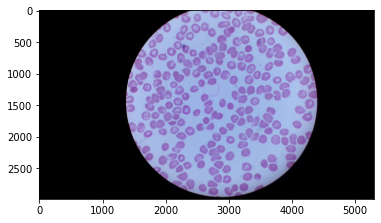

In [181]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
#img = cv2.flip(img, 1)
plt.imshow(img)

In [182]:
# cv2.circle(img, df_file['position'][240][0], 1, (0,255,0), 50)
# plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


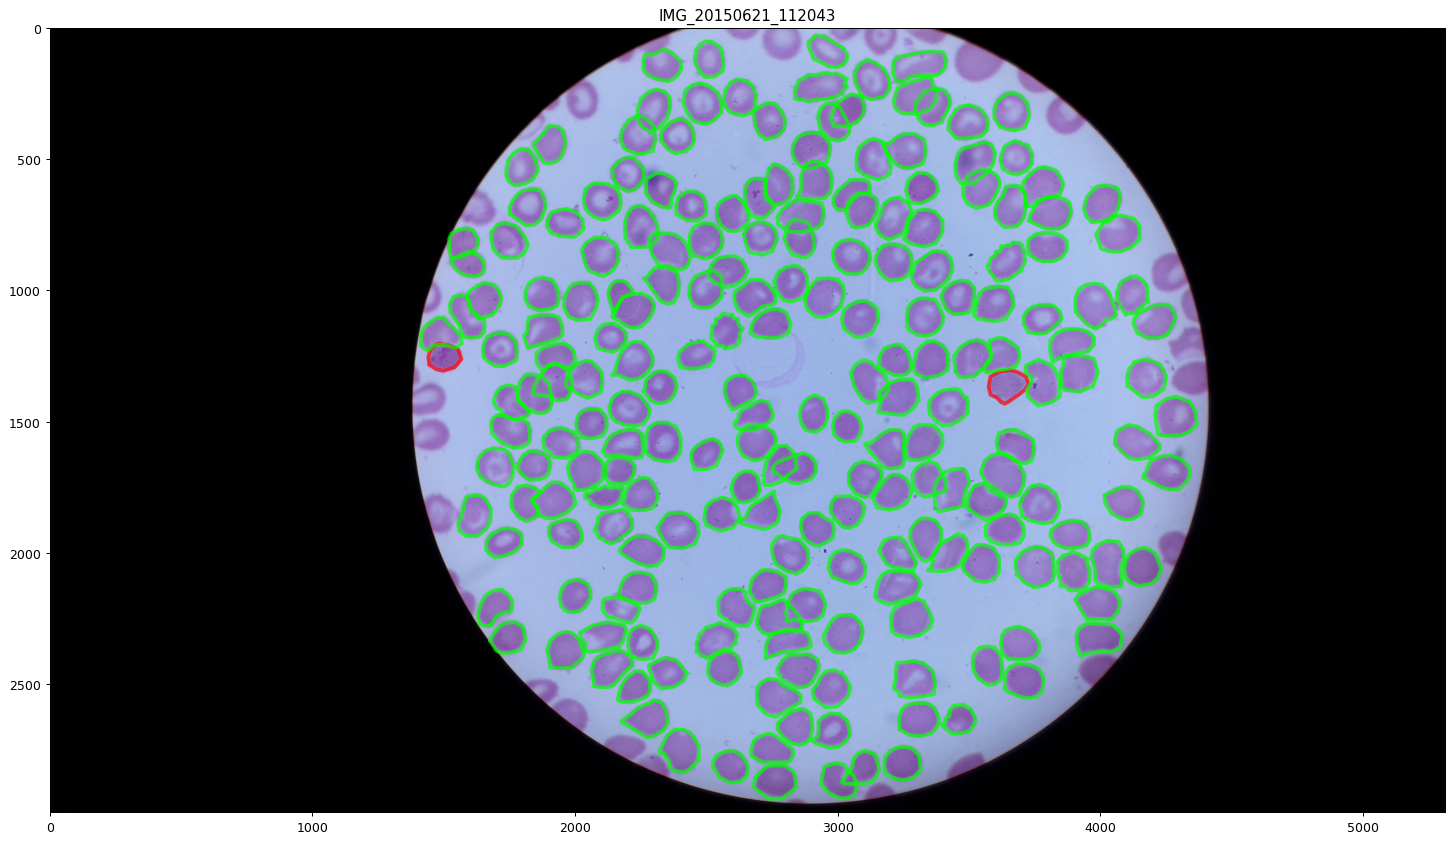

In [183]:
fig = plt.figure(1, figsize=(20,20), dpi=90)
df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row), axis = 1)
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


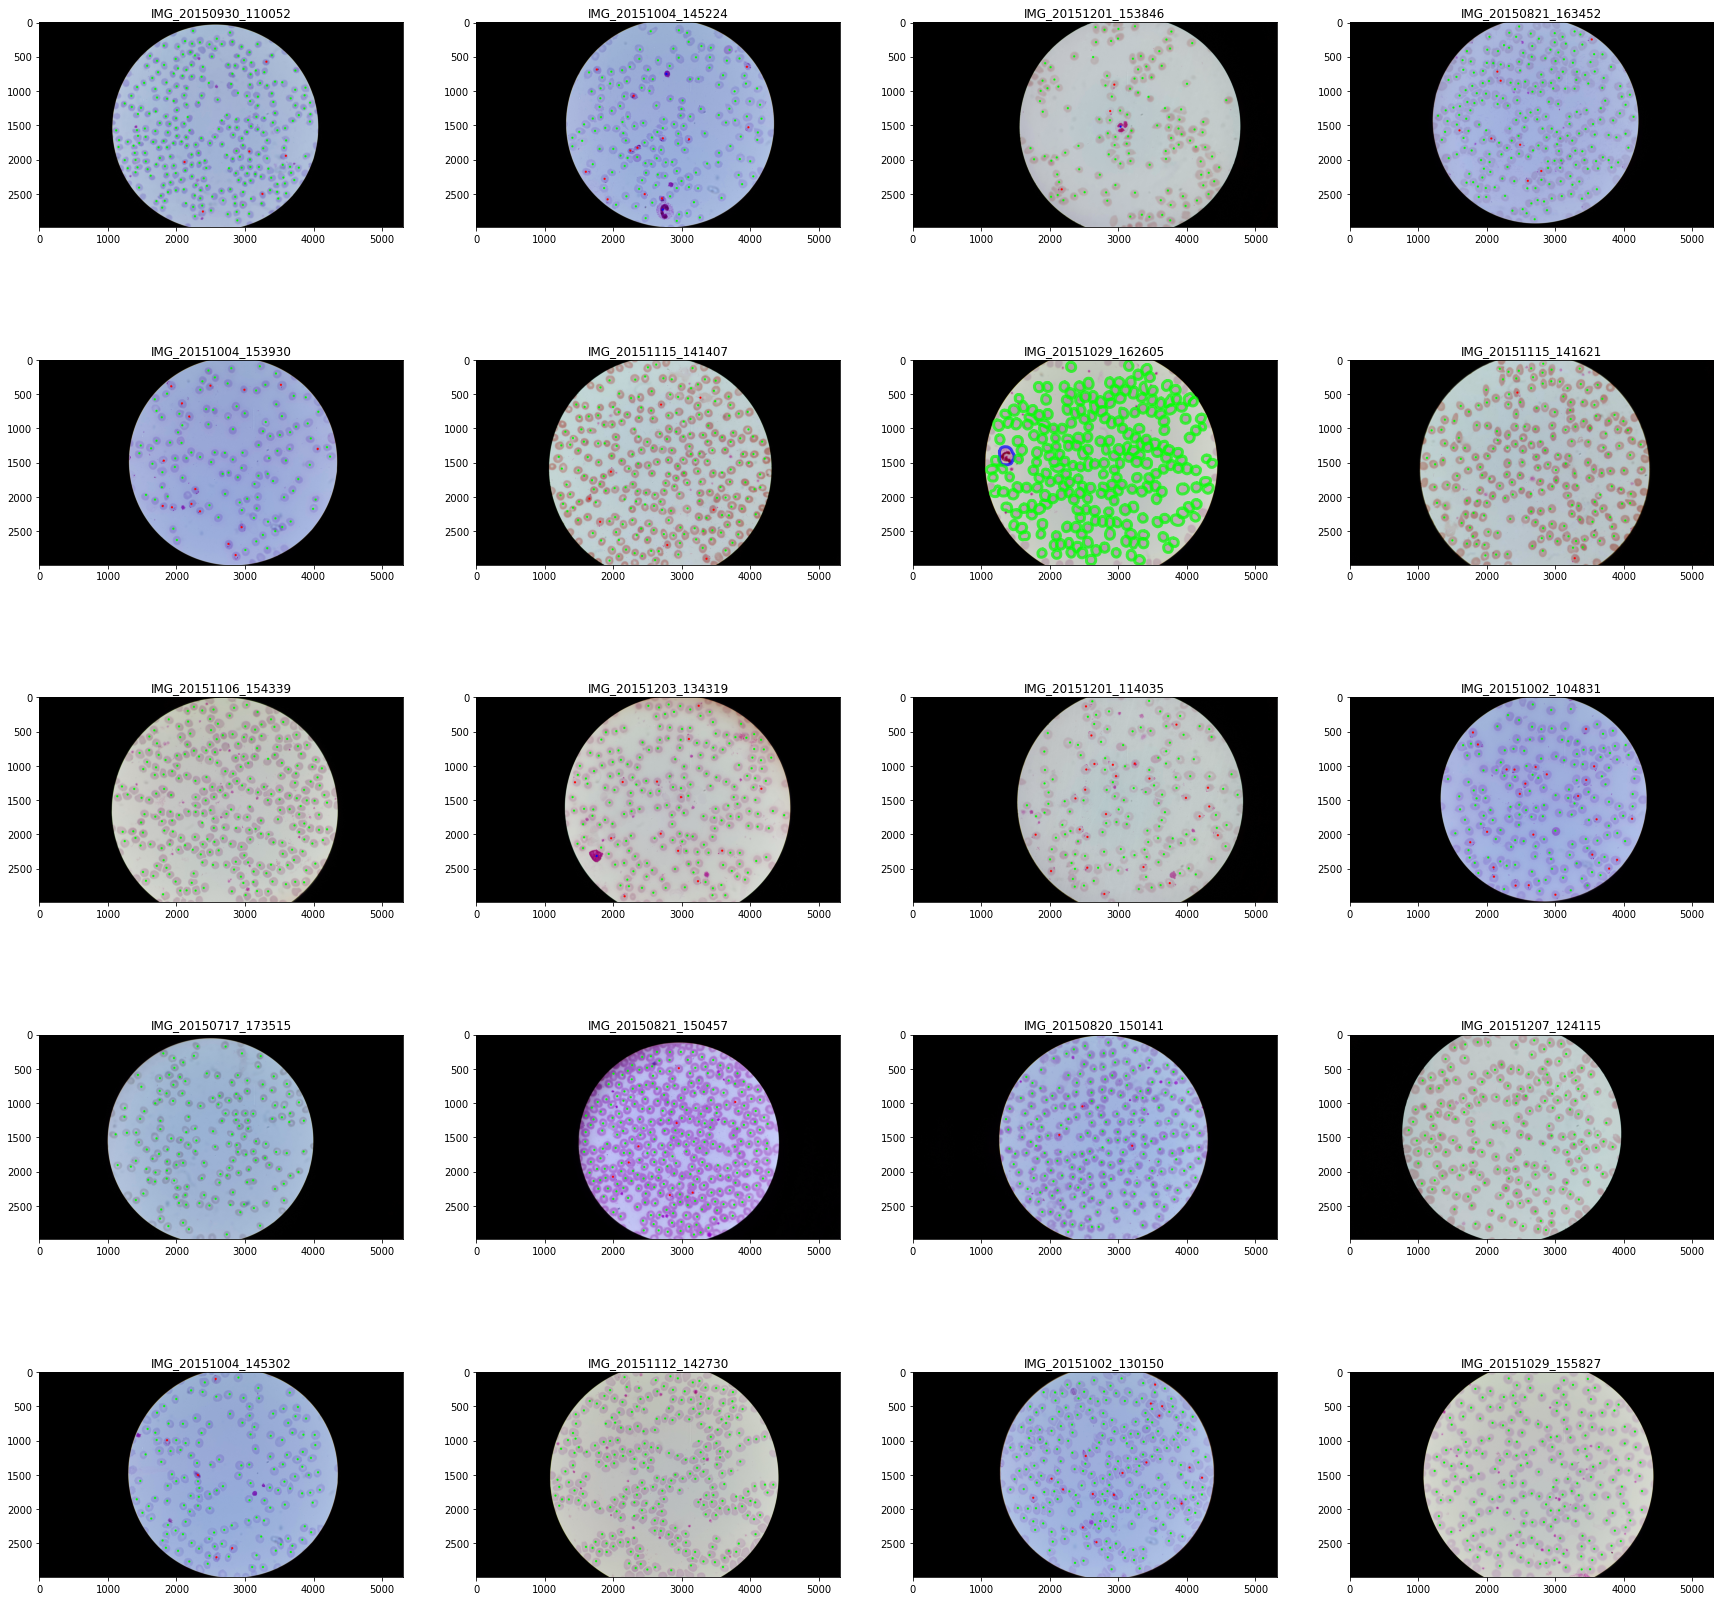

In [184]:
secure_random = random.SystemRandom()

w, h = 10, 10
fig=plt.figure(figsize=(30, 30))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    filename = secure_random.choice(df['filename'].unique())
    df_file = df[df['filename'] == filename]
    #print(filename)
    img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
    df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['position'], row = row, rows = rows, columns = columns, i = i, point_size= 30), axis = 1)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

# Polygons to mask

In [185]:
def poly_mask(row):
    poly = Polygon(row['position'])
    mask = poly.ravel().tolist()

In [186]:
filename =  'IMG_20151029_162934'

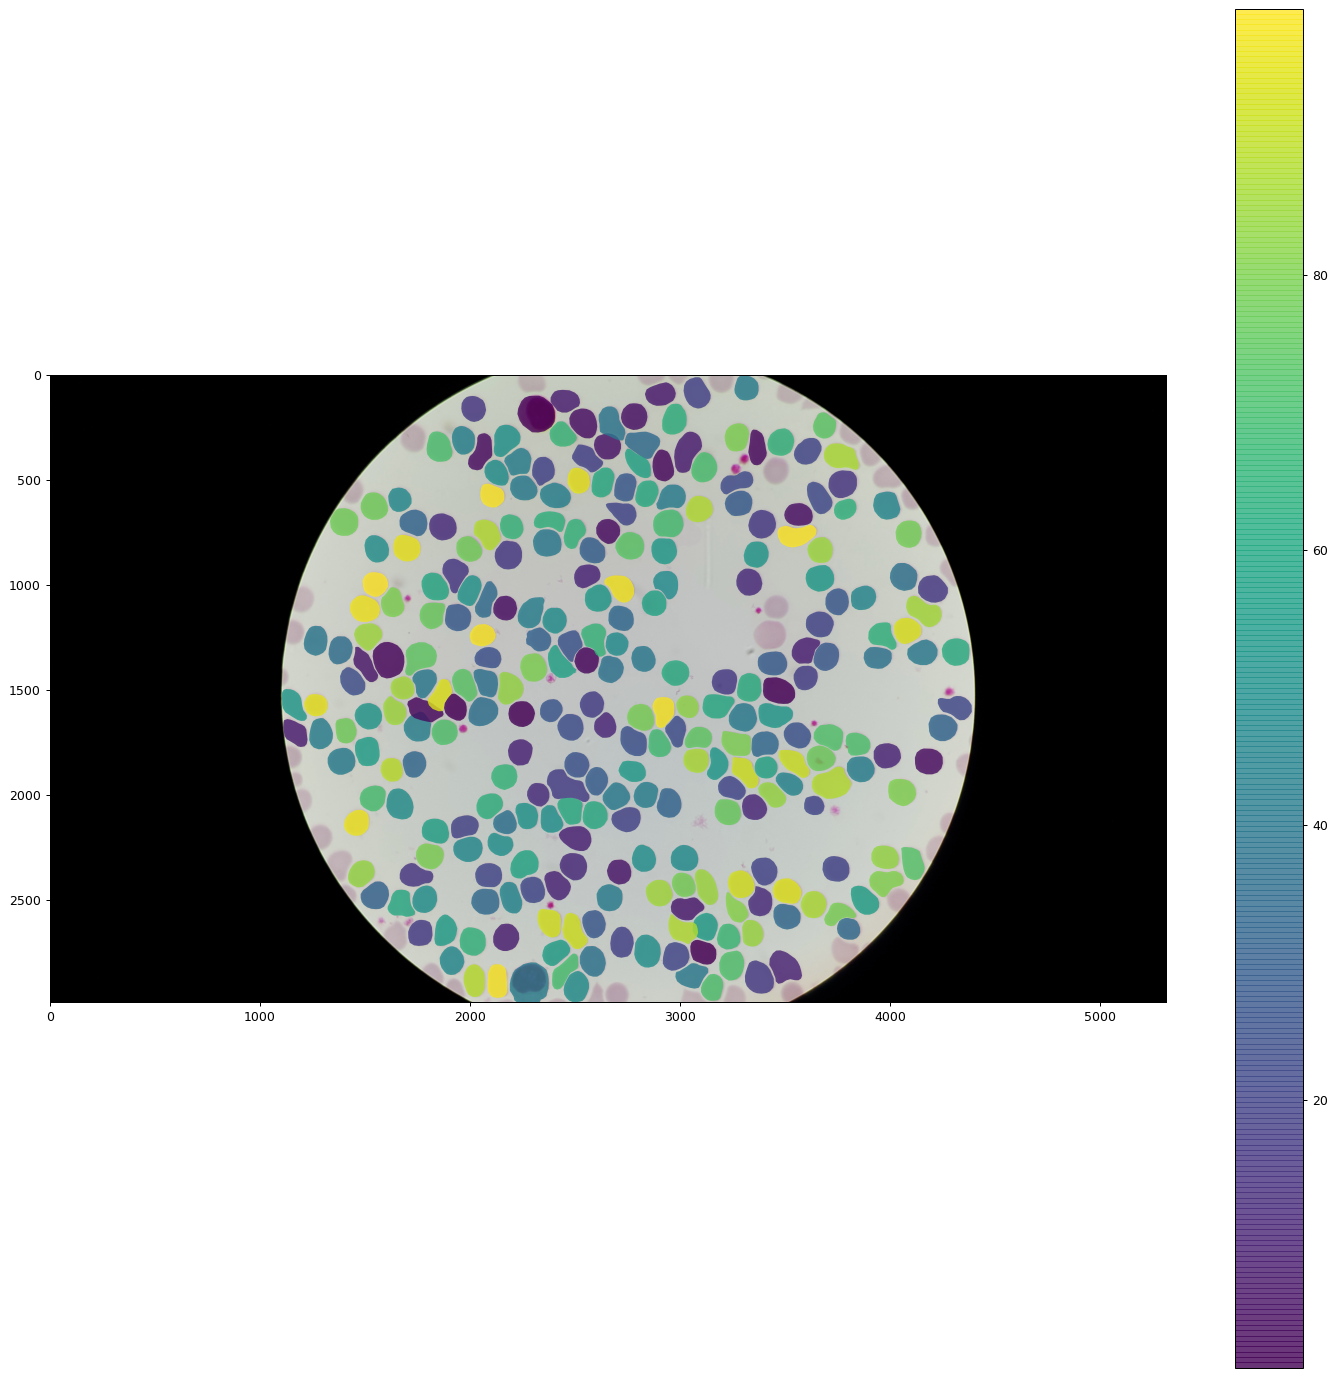

In [187]:
patches = []
patches = [ Polygon(poly) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position'] ]

img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
empty_img = Image.new("L", [img.shape[1], img.shape[0]], 0)
mask = np.array(empty_img)

fig = plt.figure(1, figsize=(20,20), dpi=90)
ax = fig.add_subplot(111)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.imshow(img)

image shape:  <PIL.Image.Image image mode=1 size=5312x2988 at 0x7F1129A2FE10>


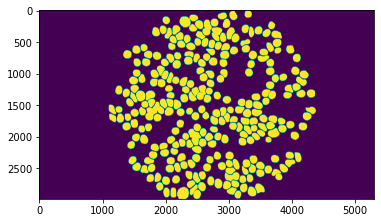

In [188]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)

img = Image.new("L", [img.shape[1], img.shape[0]], 0)
img = img.convert('1')
print('image shape: ', img)
[ ImageDraw.Draw(img).polygon(poly, outline=1, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)

plt.imshow(mask)

img.save('Images/polygon_mask.png')

In [189]:
def poly2mask(filename):
    img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
    img = Image.new("L", [img.shape[1], img.shape[0]], 0)
    img = img.convert('1')
    [ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
    # mask = np.array(img)
    # data = Image.fromarray(mask) 
    # # saving the final output  
    # # as a PNG file 
    # data = data.convert('1')
    # data.save(f'../masks/mask_{filename}.png')
    if not os.path.isdir('../data/masks'):
        os.makedirs('../data/masks')

    mask_path = f'../data/masks/mask_{filename}.png'
    img.save(mask_path)
    return mask, mask_path

In [190]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

## Connected Components

In [191]:
def connected_component_label(img):
    # https://iq.opengenus.org/connected-component-labeling/
    # https://stackoverflow.com/questions/13572448/replace-values-of-a-numpy-index-array-with-values-of-a-list


    num_labels, labels = cv2.connectedComponents(img)
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    palette = np.arange(1, 179)
    list_rand_nums = np.random.randint(1,179, 179)
    # list_rand_nums gives the new values you wish palette to be mapped to.
    index = np.digitize(label_hue.ravel(), palette, right=True)
    random_hue = np.uint8(list_rand_nums[index].reshape(label_hue.shape))

    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([random_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    
    # Showing Original Image
    plt.imshow(mask)
    plt.axis("off")
    plt.title("Orginal Image")
    plt.show()
    
    #Showing Image after Component Labeling
    plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGRA2RGB))
    plt.axis('off')
    plt.title("Image after Component Labeling")
    plt.show()

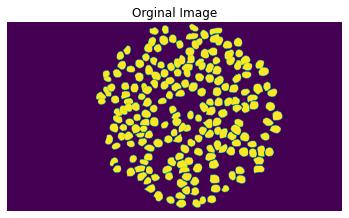

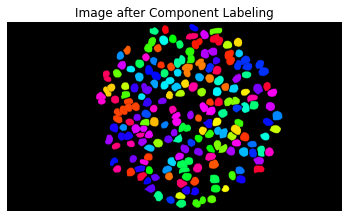

In [192]:
img = cv2.imread(df.loc[(df['annotation_type'] == 'Polygon')  & (df['filename'] == filename), 'img_path'].iloc[-1], cv2.IMREAD_COLOR)
img = Image.new("L", [img.shape[1], img.shape[0]], 0)
#img = img.convert('1')
[ ImageDraw.Draw(img).polygon(poly, outline=0, fill=1) for poly in df.loc[(df['annotation_type'] == 'Polygon') & (df['filename'] == filename), 'position']]
mask = np.array(img)
connected_component_label(mask)

In [193]:
num_labels, labels = cv2.connectedComponents(mask)
print(len(labels[0]))
print(np.max(labels))

5312
175


In [194]:
df

Patient no - Cell no        cell     comment annotation_type  \
0                       3-1  Uninfected  No_comment         Polygon   
1                       3-2  Uninfected  No_comment         Polygon   
2                       3-3  Uninfected  No_comment         Polygon   
3                       3-4  Uninfected  No_comment         Polygon   
4                       3-5  Uninfected  No_comment         Polygon   
...                     ...         ...         ...             ...   
196929                5-200  Uninfected  No_Comment           Point   
196930                5-201  Uninfected  No_Comment           Point   
196931                5-202  Uninfected  No_Comment           Point   
196932                5-203  Uninfected  No_Comment           Point   
196933                5-204  Uninfected  No_Comment           Point   

       Number of points                                           position  \
0                    14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1                    15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2                    14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3                    14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4                    14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   
...                 ...                                                ...   
196929                1                                      [(2080, 643)]   
196930                1                                      [(1790, 606)]   
196931                1                                      [(1757, 756)]   
196932                1                                      [(1860, 856)]   
196933                1                                      [(1623, 683)]   

                   filename  \
0       IMG_20150817_103139   
1       IMG_20150817_103139   
2       IMG_20150817_103139   
3       IMG_20150817_103139   
4       IMG_20150817_103139   
...                     ...   
196929  IMG_20151115_181859   
196930  IMG_20151115_181859   
196931  IMG_20151115_181859   
196932  IMG_20151115_181859   
196933  IMG_20151115_181859   

                                                 txt_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                                                 img_path  \
0       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4       ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                   ...   
196929  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196930  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196931  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196932  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   
196933  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/34...   

                           bbx  patient_n_path  
0        [2905, 33, 3033, 131]              40  
1       [2951, 141, 3071, 272]              40  
2       [2658, 135, 2801, 276]              40  
3       [2332, 137, 2454, 265]              40  
4       [2499, 140, 2631, 272]              40  
...                        ...             ...  
196929  [2010, 573, 2150, 713]     

# Cutting and tiling images and labels

(2988, 5312)


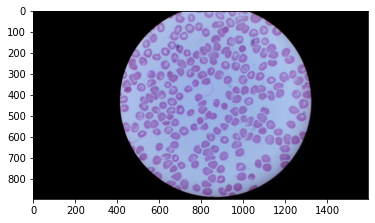

In [195]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
resize_factor = .3
print(img.shape[:2])
resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))), interpolation=cv2.INTER_AREA)
plt.imshow(resized_img)

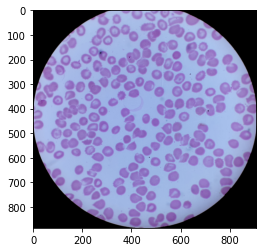

In [196]:
# select circle only
img_gray = rgb2gray(resized_img)
th = threshold_otsu(img_gray)
fg = img_gray>th
# Find the bounding box of those pixels
coords = np.array(np.nonzero(fg))
top_left = np.min(coords, axis=1)
bottom_right = np.max(coords, axis=1)

#set all under threshhold values to zero 
img_circle = resized_img*gray2rgb(fg)

img_cropped = img_circle[top_left[0]:bottom_right[0],
            top_left[1]:bottom_right[1]]

plt.imshow(img_cropped)

In [197]:
df_file

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   
...                    ...          ...         ...             ...   
15397                2-205   Uninfected  No_comment         Polygon   
15398                2-206   Uninfected  No_comment         Polygon   
15399                2-207   Uninfected  No_comment         Polygon   
15400                2-208   Uninfected  No_comment         Polygon   
15401                2-209   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   
...                ...                                                ...   
15397               12  [(3293, 1312), (3289, 1277), (3303, 1227), (33...   
15398               21  [(3351, 1471), (3351, 1454), (3346, 1440), (33...   
15399               12  [(3259, 1631), (3259, 1594), (3271, 1552), (32...   
15400               18  [(3253, 1587), (3253, 1548), (3241, 1534), (32...   
15401               16  [(4166, 1704), (4176, 1688), (4184, 1664), (41...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                    ...                                                ...   
15397  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
...                                                  ...   
15397  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15398  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15399  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15400  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15401  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  
15193  [3575, 1304, 3727, 1432]               3  
15194  [1441, 1202, 1568, 1307]               3  
15195  [2856, 1398, 2960, 1541]               3  
15196  [2982, 1460, 3091, 1578]               3  
15197  [3043, 1651, 3169, 1788]               3  
...                         ...             ...  
15397  [3289, 1194, 3419, 1331]               3  
15398  [3346, 1375, 3496, 1515]               3  
15399  [3259, 1511, 3400, 1647]               3  
15400  [3104, 1532, 3255, 1679]   

## Cut fit to circle

In [278]:
def adjust_poly_coord(poly_coords, removed_left, removed_top):
    '''returns a list of polgones with adjusted coordinates'''
    return [(poly[0] - removed_left, poly [1] - removed_top) for poly in poly_coords]
        
def circle_crop(img_path):
    '''returns a cropped image according to the circle as well as the removed top part and removed left part of the image'''
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # select circle only
    img_gray = rgb2gray(img)
    th = threshold_otsu(img_gray)
    fg = img_gray>th
    # Find the bounding box of those pixels
    coords = np.array(np.nonzero(fg))
    min_coords = np.min(coords, axis=1)
    max_coords = np.max(coords, axis=1)

    #set all under threshhold values to zero 
    img_circle = img*gray2rgb(fg)

    img_cropped = img_circle[min_coords[0]:max_coords[0],
                min_coords[1]:max_coords[1]]
    
    return img_cropped, min_coords[0], min_coords[1]

In [282]:
def adjust_coordinates(img_path, position, annotation_type):
    '''returns adjusted coordinates and fitted circle img path '''
    removed_top, removed_left, outname_im = dict_rmv_fit_to_circle[img_path]
    adjusted_polys = adjust_poly_coord(position, removed_left, removed_top)
    return adjusted_polys


In [231]:
check_if_outdir_im_circle = os.path.isdir('../data/fit_to_circle')

if not check_if_outdir_im_circle:
    os.makedirs('../data/fit_to_circle')

In [234]:
 # we want to save all images and also create a dictionary with the pixels removed at the top and bottom
dict_rmv_fit_to_circle = {}
dict_patient_n = dict(zip(df['img_path'], df['patient_n_path']))
dict_filename = dict(zip(df['img_path'], df['filename']))

for img_path in df['img_path'].unique():
    img_cropped, removed_top, removed_left = circle_crop(img_path)  
    patient_n_path = dict_patient_n[img_path]
    filename = dict_filename[img_path]
    outname_im = os.path.join('../data/fit_to_circle/cropped_P' + str(patient_n_path) + '_' + filename + '.jpg')

    cv2.imwrite(outname_im, img_cropped)
    print('saved: ', outname_im)

    dict_rmv_fit_to_circle[img_path] = [removed_top, removed_left, outname_im]
    

saved:  ../data/fit_to_circle/cropped_P40_IMG_20150817_103139.jpg
saved:  ../data/fit_to_circle/cropped_P40_IMG_20150817_103303.jpg
saved:  ../data/fit_to_circle/cropped_P40_IMG_20150817_102702.jpg
saved:  ../data/fit_to_circle/cropped_P40_IMG_20150817_102823.jpg
saved:  ../data/fit_to_circle/cropped_P40_IMG_20150817_103901.jpg
saved:  ../data/fit_to_circle/cropped_P13_IMG_20150725_123938.jpg
saved:  ../data/fit_to_circle/cropped_P13_IMG_20150725_125213.jpg
saved:  ../data/fit_to_circle/cropped_P13_IMG_20150725_125847.jpg
saved:  ../data/fit_to_circle/cropped_P13_IMG_20150725_124606.jpg
saved:  ../data/fit_to_circle/cropped_P13_IMG_20150725_124830.jpg
saved:  ../data/fit_to_circle/cropped_P89_IMG_20151004_130810.jpg
saved:  ../data/fit_to_circle/cropped_P89_IMG_20151004_130408.jpg
saved:  ../data/fit_to_circle/cropped_P89_IMG_20151004_130549.jpg
saved:  ../data/fit_to_circle/cropped_P89_IMG_20151004_131030.jpg
saved:  ../data/fit_to_circle/cropped_P89_IMG_20151004_131129.jpg
saved:  ..

saved:  ../data/fit_to_circle/cropped_P28_IMG_20150819_115955.jpg
saved:  ../data/fit_to_circle/cropped_P208_IMG_20150611_104609.jpg
saved:  ../data/fit_to_circle/cropped_P208_IMG_20150611_104510.jpg
saved:  ../data/fit_to_circle/cropped_P208_IMG_20150611_104404.jpg
saved:  ../data/fit_to_circle/cropped_P208_IMG_20150611_104753.jpg
saved:  ../data/fit_to_circle/cropped_P208_IMG_20150611_104824.jpg
saved:  ../data/fit_to_circle/cropped_P209_IMG_20151207_114605.jpg
saved:  ../data/fit_to_circle/cropped_P209_IMG_20151207_114345.jpg
saved:  ../data/fit_to_circle/cropped_P209_IMG_20151207_114038.jpg
saved:  ../data/fit_to_circle/cropped_P209_IMG_20151207_114653.jpg
saved:  ../data/fit_to_circle/cropped_P209_IMG_20151207_114444.jpg
saved:  ../data/fit_to_circle/cropped_P8_IMG_20150714_093636.jpg
saved:  ../data/fit_to_circle/cropped_P8_IMG_20150714_093600.jpg
saved:  ../data/fit_to_circle/cropped_P8_IMG_20150714_093806.jpg
saved:  ../data/fit_to_circle/cropped_P8_IMG_20150714_093715.jpg
save

saved:  ../data/fit_to_circle/cropped_P217_IMG_20151112_162843.jpg
saved:  ../data/fit_to_circle/cropped_P217_IMG_20151112_163036.jpg
saved:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113915.jpg
saved:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113953.jpg
saved:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113735.jpg
saved:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113803.jpg
saved:  ../data/fit_to_circle/cropped_P218_IMG_20151112_113836.jpg
saved:  ../data/fit_to_circle/cropped_P132_IMG_20151119_152913.jpg
saved:  ../data/fit_to_circle/cropped_P132_IMG_20151119_153425.jpg
saved:  ../data/fit_to_circle/cropped_P132_IMG_20151119_153512.jpg
saved:  ../data/fit_to_circle/cropped_P132_IMG_20151119_153347.jpg
saved:  ../data/fit_to_circle/cropped_P132_IMG_20151119_153150.jpg
saved:  ../data/fit_to_circle/cropped_P219_IMG_20151112_161024.jpg
saved:  ../data/fit_to_circle/cropped_P219_IMG_20151112_160059.jpg
saved:  ../data/fit_to_circle/cropped_P219_IMG_20151112_160635

saved:  ../data/fit_to_circle/cropped_P142_IMG_20151127_160514.jpg
saved:  ../data/fit_to_circle/cropped_P142_IMG_20151127_155914.jpg
saved:  ../data/fit_to_circle/cropped_P142_IMG_20151127_155722.jpg
saved:  ../data/fit_to_circle/cropped_P224_IMG_20151112_154251.jpg
saved:  ../data/fit_to_circle/cropped_P224_IMG_20151112_154424.jpg
saved:  ../data/fit_to_circle/cropped_P224_IMG_20151112_154345.jpg
saved:  ../data/fit_to_circle/cropped_P224_IMG_20151112_154211.jpg
saved:  ../data/fit_to_circle/cropped_P224_IMG_20151112_154719.jpg
saved:  ../data/fit_to_circle/cropped_P62_IMG_20150918_151006.jpg
saved:  ../data/fit_to_circle/cropped_P62_IMG_20150918_151239.jpg
saved:  ../data/fit_to_circle/cropped_P62_IMG_20150918_150842.jpg
saved:  ../data/fit_to_circle/cropped_P62_IMG_20150918_151149.jpg
saved:  ../data/fit_to_circle/cropped_P62_IMG_20150918_151335.jpg
saved:  ../data/fit_to_circle/cropped_P20_IMG_20150803_112802.jpg
saved:  ../data/fit_to_circle/cropped_P20_IMG_20150803_111244.jpg
sa

saved:  ../data/fit_to_circle/cropped_P125_IMG_20151116_114404.jpg
saved:  ../data/fit_to_circle/cropped_P125_IMG_20151116_113651.jpg
saved:  ../data/fit_to_circle/cropped_P125_IMG_20151116_113954.jpg
saved:  ../data/fit_to_circle/cropped_P125_IMG_20151116_115112.jpg
saved:  ../data/fit_to_circle/cropped_P54_IMG_20150821_162901.jpg
saved:  ../data/fit_to_circle/cropped_P54_IMG_20150821_163640.jpg
saved:  ../data/fit_to_circle/cropped_P54_IMG_20150821_163452.jpg
saved:  ../data/fit_to_circle/cropped_P54_IMG_20150821_162641.jpg
saved:  ../data/fit_to_circle/cropped_P54_IMG_20150821_163815.jpg
saved:  ../data/fit_to_circle/cropped_P145_IMG_20151203_102405.jpg
saved:  ../data/fit_to_circle/cropped_P145_IMG_20151203_103114.jpg
saved:  ../data/fit_to_circle/cropped_P145_IMG_20151203_102543.jpg
saved:  ../data/fit_to_circle/cropped_P145_IMG_20151203_103326.jpg
saved:  ../data/fit_to_circle/cropped_P145_IMG_20151203_103637.jpg
saved:  ../data/fit_to_circle/cropped_P25_IMG_20150818_152613.jpg
s

saved:  ../data/fit_to_circle/cropped_P123_IMG_20151116_104114.jpg
saved:  ../data/fit_to_circle/cropped_P123_IMG_20151116_102655.jpg
saved:  ../data/fit_to_circle/cropped_P123_IMG_20151116_104451.jpg
saved:  ../data/fit_to_circle/cropped_P123_IMG_20151116_104342.jpg
saved:  ../data/fit_to_circle/cropped_P123_IMG_20151116_102751.jpg
saved:  ../data/fit_to_circle/cropped_P51_IMG_20150821_115846.jpg
saved:  ../data/fit_to_circle/cropped_P51_IMG_20150821_115310.jpg
saved:  ../data/fit_to_circle/cropped_P51_IMG_20150821_120044.jpg
saved:  ../data/fit_to_circle/cropped_P51_IMG_20150821_115700.jpg
saved:  ../data/fit_to_circle/cropped_P51_IMG_20150821_115056.jpg
saved:  ../data/fit_to_circle/cropped_P27_IMG_20150818_164008.jpg
saved:  ../data/fit_to_circle/cropped_P27_IMG_20150818_163551.jpg
saved:  ../data/fit_to_circle/cropped_P27_IMG_20150818_164702.jpg
saved:  ../data/fit_to_circle/cropped_P27_IMG_20150818_163419.jpg
saved:  ../data/fit_to_circle/cropped_P27_IMG_20150818_164408.jpg
saved

saved:  ../data/fit_to_circle/cropped_P129_IMG_20151118_153739.jpg
saved:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161412.jpg
saved:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161055.jpg
saved:  ../data/fit_to_circle/cropped_P9_IMG_20150721_160944.jpg
saved:  ../data/fit_to_circle/cropped_P9_IMG_20150721_161243.jpg
saved:  ../data/fit_to_circle/cropped_P9_IMG_20150721_160406.jpg
saved:  ../data/fit_to_circle/cropped_P137_IMG_20151201_114035.jpg
saved:  ../data/fit_to_circle/cropped_P137_IMG_20151201_120845.jpg
saved:  ../data/fit_to_circle/cropped_P137_IMG_20151201_121303.jpg
saved:  ../data/fit_to_circle/cropped_P137_IMG_20151201_121808.jpg
saved:  ../data/fit_to_circle/cropped_P137_IMG_20151201_121724.jpg
saved:  ../data/fit_to_circle/cropped_P115_IMG_20151115_141543.jpg
saved:  ../data/fit_to_circle/cropped_P115_IMG_20151115_141621.jpg
saved:  ../data/fit_to_circle/cropped_P115_IMG_20151115_141407.jpg
saved:  ../data/fit_to_circle/cropped_P115_IMG_20151115_141336.jpg
saved

saved:  ../data/fit_to_circle/cropped_P243_IMG_20151106_150314.jpg
saved:  ../data/fit_to_circle/cropped_P243_IMG_20151106_145856.jpg
saved:  ../data/fit_to_circle/cropped_P59_IMG_20150917_153801.jpg
saved:  ../data/fit_to_circle/cropped_P59_IMG_20150917_153600.jpg
saved:  ../data/fit_to_circle/cropped_P59_IMG_20150917_153311.jpg
saved:  ../data/fit_to_circle/cropped_P59_IMG_20150917_153938.jpg
saved:  ../data/fit_to_circle/cropped_P59_IMG_20150917_153030.jpg
saved:  ../data/fit_to_circle/cropped_P44_IMG_20150817_133454.jpg
saved:  ../data/fit_to_circle/cropped_P44_IMG_20150817_133218.jpg
saved:  ../data/fit_to_circle/cropped_P44_IMG_20150817_133355.jpg
saved:  ../data/fit_to_circle/cropped_P44_IMG_20150817_134331.jpg
saved:  ../data/fit_to_circle/cropped_P44_IMG_20150817_133609.jpg
saved:  ../data/fit_to_circle/cropped_P19_IMG_20150802_122338.jpg
saved:  ../data/fit_to_circle/cropped_P19_IMG_20150802_122215.jpg
saved:  ../data/fit_to_circle/cropped_P19_IMG_20150802_121847.jpg
saved:  

In [283]:
df['adjusted_position'] = df.apply(lambda row: adjust_coordinates(row.img_path, row.position, row.annotation_type), axis = 1) 

In [284]:
df['img_path_fit_to_circle'] = df['img_path'].apply(lambda x: dict_rmv_fit_to_circle[x][2])
df.head()

Patient no - Cell no        cell     comment annotation_type  \
0                  3-1  Uninfected  No_comment         Polygon   
1                  3-2  Uninfected  No_comment         Polygon   
2                  3-3  Uninfected  No_comment         Polygon   
3                  3-4  Uninfected  No_comment         Polygon   
4                  3-5  Uninfected  No_comment         Polygon   

  Number of points                                           position  \
0               14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1               15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2               14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3               14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4               14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   

              filename                                           txt_path  \
0  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                            img_path                     bbx  \
0  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]   
1  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]   
2  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]   
3  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]   
4  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]   

   patient_n_path                                  adjusted_position  \
0              40  [(1652, 29), (1673, 24), (1710, 26), (1733, 35...   
1              40  [(1731, 132), (1711, 135), (1690, 148), (1674,...   
2              40  [(1448, 126), (1422, 135), (1390, 156), (1379,...   
3              40  [(1097, 128), (1071, 140), (1052, 160), (1050,...   
4              40  [(1293, 131), (1266, 136), (1240, 152), (1218,...   

                              img_path_fit_to_circle train_test adjusted_bbx  
0  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train         None  
1  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train         None  
2  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train         None  
3  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train         None  
4  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train         None

In [285]:
filename =  'IMG_20150621_112043' #'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file.head()

Patient no - Cell no         cell     comment annotation_type  \
15193                  2-1  Parasitized  No_comment         Polygon   
15194                  2-2  Parasitized  No_comment         Polygon   
15195                  2-3   Uninfected  No_comment         Polygon   
15196                  2-4   Uninfected  No_comment         Polygon   
15197                  2-5   Uninfected  No_comment         Polygon   

      Number of points                                           position  \
15193               14  [(3624, 1426), (3603, 1407), (3582, 1398), (35...   
15194               11  [(1446, 1284), (1473, 1301), (1498, 1307), (15...   
15195               11  [(2916, 1541), (2951, 1517), (2960, 1491), (29...   
15196               12  [(3007, 1569), (2987, 1551), (2982, 1516), (29...   
15197               10  [(3104, 1788), (3128, 1782), (3166, 1720), (31...   

                  filename                                           txt_path  \
15193  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  IMG_20150621_112043  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                                img_path  \
15193  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15194  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15195  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15196  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
15197  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                            bbx  patient_n_path  \
15193  [3575, 1304, 3727, 1432]               3   
15194  [1441, 1202, 1568, 1307]               3   
15195  [2856, 1398, 2960, 1541]               3   
15196  [2982, 1460, 3091, 1578]               3   
15197  [3043, 1651, 3169, 1788]               3   

                                       adjusted_position  \
15193  [(2245, 1426), (2224, 1407), (2203, 1398), (21...   
15194  [(67, 1284), (94, 1301), (119, 1307), (163, 12...   
15195  [(1537, 1541), (1572, 1517), (1581, 1491), (15...   
15196  [(1628, 1569), (1608, 1551), (1603, 1516), (16...   
15197  [(1725, 1788), (1749, 1782), (1787, 1720), (17...   

                                  img_path_fit_to_circle train_test  \
15193  ../data/fit_to_circle/cropped_P3_IMG_20150621_...      train   
15194  ../data/fit_to_circle/cropped_P3_IMG_20150621_...      train   
15195  ../data/fit_to_circle/cropped_P3_IMG_20150621_...      train   
15196  ../data/fit_to_circle/cropped_P3_IMG_20150621_...      train   
15197  ../data/fit_to_circle/cropped_P3_IMG_20150621_...      train   

      adjusted_bbx  
15193         None  
15194         None  
15195         None  
15196         None  
15197         None

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


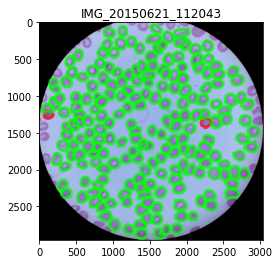

In [286]:
img = cv2.imread(df_file['img_path_fit_to_circle'].iloc[-1], cv2.IMREAD_COLOR)
plt.imshow(img)
fig = plt.figure(1, figsize=(20,20), dpi=90)
df_file.apply(lambda row: draw_points(img, row['cell'], row['annotation_type'], row['adjusted_position'], row), axis = 1)
plt.imshow(img)

In [287]:
def get_bbx(position, annotation_type, bb_pixel):
    if annotation_type == 'Polygon':
        poly_list = np.array([list(ele) for ele in position])
        x_min = np.nanmin(poly_list[:, 0])
        x_max = np.nanmax(poly_list[:, 0])
        y_min = np.nanmin(poly_list[:, 1])
        y_max = np.nanmax(poly_list[:, 1])
        return [x_min, y_min, x_max, y_max]
    if annotation_type == 'Point':
        point_list = np.array(position)
        x_min = int(point_list[:, 0] - 0.5 * bb_pixel)
        x_max = int(point_list[:, 0] + 0.5 * bb_pixel)
        y_min = int(point_list[:, 1] - 0.5 * bb_pixel)
        y_max = int(point_list[:, 1] + 0.5 * bb_pixel)
        return [x_min, y_min, x_max, y_max]

In [306]:
df['adjusted_bbx'] = df.apply(lambda row: get_bbx(row['adjusted_position'], row['annotation_type'], 150), axis = 1)

In [307]:
filename =  'IMG_20150623_134547' 
df_file = df[df['filename'] == filename]
df_file.head()

Patient no - Cell no         cell     comment annotation_type  \
149122                  2-1  Parasitized  No_Comment           Point   
149123                  2-2   Uninfected  No_Comment           Point   
149124                  2-3   Uninfected  No_Comment           Point   
149125                  2-4   Uninfected  No_Comment           Point   
149126                  2-5   Uninfected  No_Comment           Point   

       Number of points        position             filename  \
149122                1  [(1131, 1205)]  IMG_20150623_134547   
149123                1  [(3804, 1277)]  IMG_20150623_134547   
149124                1  [(1898, 1277)]  IMG_20150623_134547   
149125                1  [(1818, 1350)]  IMG_20150623_134547   
149126                1  [(1828, 1481)]  IMG_20150623_134547   

                                                 txt_path  \
149122  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149123  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149124  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149125  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149126  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   

                                                 img_path  \
149122  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149123  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149124  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149125  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   
149126  ../data/NIH-NLM-ThinBloodSmearsPf/Point Set/14...   

                             bbx  patient_n_path adjusted_position  \
149122  [1061, 1135, 1201, 1275]               5     [(131, 1171)]   
149123  [3734, 1207, 3874, 1347]               5    [(2804, 1243)]   
149124  [1828, 1207, 1968, 1347]               5     [(898, 1243)]   
149125  [1748, 1280, 1888, 1420]               5     [(818, 1316)]   
149126  [1758, 1411, 1898, 1551]               5     [(828, 1447)]   

                                   img_path_fit_to_circle train_test  \
149122  ../data/fit_to_circle/cropped_P5_IMG_20150623_...      train   
149123  ../data/fit_to_circle/cropped_P5_IMG_20150623_...      train   
149124  ../data/fit_to_circle/cropped_P5_IMG_20150623_...      train   
149125  ../data/fit_to_circle/cropped_P5_IMG_20150623_...      train   
149126  ../data/fit_to_circle/cropped_P5_IMG_20150623_...      train   

                    adjusted_bbx  
149122     [56, 1096, 206, 1246]  
149123  [2729, 1168, 2879, 1318]  
149124    [823, 1168, 973, 1318]  
149125    [743, 1241, 893, 1391]  
149126    [753, 1372, 903, 1522]

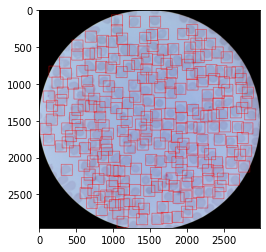

In [308]:
img = cv2.imread(df_file['img_path_fit_to_circle'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['adjusted_bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)

## Crop tiles

In [ ]:
def plot_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)

    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        #print(i)
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            #print(j)
            #print((offset[1]*i, min(offset[1]*i+tile_size[1], img_shape[0])), (offset[0]*j, min(offset[0]*j+tile_size[0], img_shape[1])))
            x_min = min(offset[1] * x + tile_size[1], img_shape[0])
            x_max = offset[1] * x
            y_min = min(offset[0] * y + tile_size[0], img_shape[1])
            y_max = offset[0]*y
            cv2.rectangle(img, (x_max, x_min), (y_max, y_min), (0, 0, 255), 3)
            #cropped_img = img[offset[1]*i:min(offset[1]*i+tile_size[1], img_shape[0]), offset[0]*j:min(offset[0]*j+tile_size[0], img_shape[1])]
            # Debugging the tiles
            #cv2.imwrite("debug_" + str(i) + "_" + str(j) + ".png", cropped_img)
    plt.imshow(crop_img)

def crop_tiles(img, tile_w, tile_h):
    img_shape = img.shape
    tile_size = (tile_w, tile_h)
    offset = (tile_w, tile_h)
    for x in range(int(math.ceil(img_shape[0]/(offset[1] * 1.0)))):
        for y in range(int(math.ceil(img_shape[1]/(offset[0] * 1.0)))):
            x_min = offset[1] * x
            x_max = min(offset[1] * x + tile_size[1], img_shape[0])
            y_min = offset[0]*y
            y_max = min(offset[0] * y + tile_size[0], img_shape[1])
            crop_image = img[x_min : x_min + tile_w, y_min: y_min + tile_h]
            cv2.imwrite(f'../cropped/{x_min}_{x_max}_{y_min}_{y_max}.png', crop_image) 
    #plt.imshow(crop_image)


In [ ]:
crop_tiles(img_cropped, 256, 256)

In [ ]:
def convert_labels(path, x1, y1, x2, y2):
    """
    Definition: Parses label files to extract label and bounding box
        coordinates.  Converts (x1, y1, x1, y2) KITTI format to
        (x, y, width, height) normalized YOLO format.
    """
    def sorting(l1, l2):
        if l1 > l2:
            lmax, lmin = l1, l2
            return lmax, lmin
        else:
            lmax, lmin = l2, l1
            return lmax, lmin
    size = get_img_shape(path)
    xmax, xmin = sorting(x1, x2)
    ymax, ymin = sorting(y1, y2)
    dw = 1./size[1]
    dh = 1./size[0]
    x = (xmin + xmax)/2.0
    y = (ymin + ymax)/2.0
    w = xmax - xmin
    h = ymax - ymin
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [ ]:
def get_iou(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
def get_intersection_percent(bb1, bb2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters
    ----------
    bb1 : list
        order: [x1, y1, x2, y2] 
        The (x1, y1) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner
    bb2 : list
        order: [x1, y1, x2, y2]
        The (x, y) position is at the top left corner,
        the (x2, y2) position is at the bottom right corner

    Returns
    -------
    float
        in [0, 1]
    """
    assert bb1[0] < bb1[2]
    assert bb1[1] < bb1[3]
    assert bb2[0] < bb2[2]
    assert bb2[1] < bb2[3]

    # determine the coordinates of the intersection rectangle
    x_left = max(bb1[0], bb2[0])
    y_top = max(bb1[1], bb2[1])
    x_right = min(bb1[2], bb2[2])
    y_bottom = min(bb1[3], bb2[3])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # The intersection of two axis-aligned bounding boxes is always an
    # axis-aligned bounding box
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # compute the area of both AABBs
    bb1_area = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
    bb2_area = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(bb1_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [ ]:
get_intersection_percent( [0, 0, 10, 10], [0, 0, 20, 20])

In [ ]:
###############################################################################
def slice_img(input_im, input_mask, 
                     filename,
                    outdir_im, 
                     outdir_mask,
                     outdir_label,
                      classes_dic, 
                     category, 
                     box_coords, resize_factor = 1,
                  sliceHeight=256, sliceWidth=256,
                  zero_frac_thresh=0, overlap=0, pad=0, verbose = False,
                  box_coords_dir='', yolt_coords_dir='', create_mask = False):
    '''
    ADAPTED FROM YOLT/SCRIPTS/SLICE_IM.PY
    Assume input_im is rgb
    Slice large image into smaller pieces,
    ignore slices with a percentage null greater then zero_fract_thresh'''
    
    if verbose == True:
        print('############# slice_img #############')
    img = cv2.imread(input_im, 1)  # color
    if create_mask:
        mask = cv2.imread(input_mask, 0)
    category_num = [classes_dic[k] for k in category] 

    resized_img = cv2.resize(img, (int(round(img.shape[1] * resize_factor)), int(round(img.shape[0] * resize_factor))))
    if create_mask == True:
        resized_mask = cv2.resize(mask, (int(round(mask.shape[1] * resize_factor)), int(round(mask.shape[0] * resize_factor))))
    resized_box_coords = np.array(np.round(np.array(box_coords) * np.array(resize_factor)).astype(int))


    im_h, im_w = resized_img.shape[:2]
    if verbose:
        print('im_h', im_h)
        print('im_w', im_w)

    win_size = sliceHeight*sliceWidth

    # if slice sizes are large than image, pad the edges
    if sliceHeight > im_h:
        pad = sliceHeight - im_h
    if sliceWidth > im_w:
        pad = max(pad, sliceWidth - im_w)
    # pad the edge of the image with black pixels
    if pad > 0:
        border_color = (0, 0, 0)
        resized_img = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                   cv2.BORDER_CONSTANT, value=border_color)
        if create_mask == True:
            resized_mask = cv2.copyMakeBorder(resized_img, pad, pad, pad, pad,
                                cv2.BORDER_CONSTANT, value=border_color)

    t0 = time.time()
    n_ims = 0
    n_ims_nonull = 0
    dx = int((1. - overlap) * sliceWidth)
    dy = int((1. - overlap) * sliceHeight)
    if verbose:
        print('dx', dx)
        print('dy', dy)
    dict_yolo = {}
    dict_bbx = {}
    max_annot = 0

    for y in range(0, im_h, dy):  # sliceHeight:
        for x in range(0, im_w, dx):  # sliceWidth:
            n_ims += 1
            # extract image
            # make sure we don't go past the edge of the image
            if y + sliceHeight > im_h:
                y0 = im_h - sliceHeight
            else:
                y0 = y
            if x + sliceWidth > im_w:
                x0 = im_w - sliceWidth
            else:
                x0 = x

            window_c = resized_img[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            if create_mask == True:
                window_mask = resized_mask[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
##           gt_c = gt_image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
#             gt_c = image[y0:y0 + sliceHeight, x0:x0 + sliceWidth]
            win_h, win_w = window_c.shape[:2]
    
            outname_part = 'slice_' + filename + \
            '_' + str(y0) + '_' + str(x0) + \
            '_' + str(win_h) + '_' + str(win_w) + \
            '_' + str(pad)

            if create_mask == True:
                outname_mask_part = 'slice_mask_' + filename + \
                    '_' + str(y0) + '_' + str(x0) + \
                    '_' + str(win_h) + '_' + str(win_w) + \
                    '_' + str(pad)
        

            # get black and white image
            window = cv2.cvtColor(window_c, cv2.COLOR_BGR2GRAY)

            # find threshold of image that's not black
            # https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html?highlight=threshold
            ret, thresh1 = cv2.threshold(window, 2, 255, cv2.THRESH_BINARY)
            non_zero_counts = cv2.countNonZero(thresh1)
            zero_counts = win_size - non_zero_counts
            zero_frac = float(zero_counts) / win_size
            # skip if image is mostly empty
            if zero_frac >= zero_frac_thresh:
                if verbose:
                    print("Zero frac too high at:", zero_frac)
                continue
                
            new_box_coords = []
            yolt_coords = []
            annot_count = 0

            for box, cat in zip(resized_box_coords, category_num):
                cut_box = 0
                percent_in_cut_img = get_intersection_percent(box, [x0, y0, x0 + sliceWidth, y0 + sliceHeight])

                if percent_in_cut_img > 0.75:   
                    resized_box_cat = np.asarray([box[0] - x0, box[1] - y0, box[2] - x0, box[3] - y0, cat])
                    new_box_coords.append(resized_box_cat)
                    annot_count += 1
                    # Input to convert: image size: (w,h), box: [x0, x1, y0, y1]
                    #print(box)
                    yolt_co_i = convert((win_w, win_h), box)
                    yolt_coords.append(yolt_co_i)

                    
            if annot_count > max_annot:
                max_annot = annot_count

            #  save
            outname_im = os.path.join(outdir_im, outname_part + '.png')
            if create_mask == True:
                outname_mask = os.path.join(outdir_mask, outname_mask_part + '.png')
            txt_outpath = os.path.join(outdir_label, outname_part + '.txt')

            dict_yolo[outname_im] = yolt_coords
            dict_bbx[outname_im] = new_box_coords
          

            # save yolt ims
            if verbose:
                print("image output:", outname_im)
            cv2.imwrite(outname_im, window_c)
            if create_mask == True:
                cv2.imwrite(outname_mask, window_mask)

            # save yolt labels
            txt_outfile = open(txt_outpath, "w+")
            if verbose:
                print("txt output:" + txt_outpath)
            for bb in yolt_coords:
                outstring = str(category_num) + " " + \
                    " ".join([str(a) for a in bb]) + '\n'
                if verbose:
                    print("outstring:", outstring)
                txt_outfile.write(outstring)
            txt_outfile.close()

            # if desired, save coords files
            # save box coords dictionary so that yolt_eval.py can read it
            if len(box_coords_dir) > 0:
                coords_dic = gt_dic_from_box_coords(box_coords)
                outname_pkl = os.path.join(
                    box_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(coords_dic, open(outname_pkl, 'wb'), protocol=2)
            if len(yolt_coords_dir) > 0:
                outname_pkl = os.path.join(
                    yolt_coords_dir, outname_part + '_' + category + '.pkl')
                pickle.dump(yolt_coords, open(outname_pkl, 'wb'), protocol=2)

            n_ims_nonull += 1

    if verbose:
        print("Num slices:", n_ims, "Num non-null slices:", n_ims_nonull,
              "sliceHeight", sliceHeight, "sliceWidth", sliceWidth)
        print("Time to slice", input_im, time.time()-t0, "seconds")

    return dict_yolo, dict_bbx, max_annot

def convert(size, box):
    '''Input = image size: (w,h), box: [x0, x1, y0, y1]'''
    dw = 1./size[0]
    dh = 1./size[1]
    xmid = (box[0] + box[1])/2.0
    ymid = (box[2] + box[3])/2.0
    w0 = box[1] - box[0]
    h0 = box[3] - box[2]
    x = xmid*dw
    y = ymid*dh
    w = w0*dw
    h = h0*dh
    return (x, y, w, h)

In [ ]:
def cut_images(df,
                slice_height = 256,
                slice_width = 256,
                resize_factor = 0.3,
                classes_dic = {'Uninfected': 0, 'Parasitized': 1, 'White_Blood_Cell': 2},
                zero_frac_thresh = 0.9, 
                overlap = 0, 
                pad = 0,
                verbose=False):
    
    
    dict_mask = {}
    dict_bbxs = {}
    total_max_annot = 0
    mask_path = ''
    outdir_mask = ''

    for filename in df['filename'].unique():
        create_mask = False
        if df.loc[(df['filename'] == filename),'annotation_type'].iloc[-1] ==  'Polygon':
            # first we create a black and white mask where the polygons are white
            mask, mask_path = poly2mask(filename)
            dict_mask[filename] = mask_path
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_mask = f'../data/cropped/{filename}/mask'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_mask = os.path.isdir(outdir_mask)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_mask:
                os.makedirs(outdir_mask)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)
            create_mask = True

        else: 
            # now lets slice the images (and bbx although we will proabaly not use them)
            filename = df.loc[(df['filename'] == filename),'filename'].iloc[-1]
            img_path = df.loc[(df['filename'] == filename),'img_path'].iloc[-1]

            if not os.path.isdir('../data/cropped'):
                os.makedirs('../data/cropped')

            outdir_im = f'../data/cropped/{filename}/img'
            outdir_label = f'../data/cropped/{filename}/labels'
            check_if_outdir_im = os.path.isdir(outdir_im)
            check_if_outdir_label = os.path.isdir(outdir_label)

            if not check_if_outdir_im:
                os.makedirs(outdir_im)
            if not check_if_outdir_label:
                os.makedirs(outdir_label)


        box_coords = df.loc[(df['filename'] == filename),'bbx'].tolist()
        category = df.loc[(df['filename'] == filename),'cell'].tolist()

        dict_yolo, dict_bbx, \
            max_annot = slice_img(img_path, mask_path, 
                                filename,
                                outdir_im, 
                                outdir_mask, 
                                outdir_label,
                                classes_dic, 
                                category, 
                                box_coords, 
                            sliceHeight= slice_height, sliceWidth=slice_width,
                            resize_factor = resize_factor,
                            zero_frac_thresh = zero_frac_thresh, overlap = overlap, pad = pad, verbose=False,
                            box_coords_dir='', yolt_coords_dir='', create_mask = create_mask)

        if max_annot > total_max_annot:
            total_max_annot = max_annot
            
        dict_bbxs.update(dict_bbx)
            
        print('filename: ', filename, ', len dict_bbx: ', len(dict_bbxs))

    return dict_yolo, dict_bbxs, dict_mask, total_max_annot

In [ ]:
#df_para = df.loc[(df['cell'] == 'Parasitized')].reset_index(drop=True)
df_para = df

In [ ]:
df.loc[(df['cell'] == 'Parasitized') & (df['filename'] == 'IMG_20151116_110921')]

In [ ]:
#dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df_para, classes_dic = {'Parasitized': 1})
dict_yolo, dict_bbxs, dict_mask, total_max_annot = cut_images(df)

In [ ]:
df['mask_path'] = df['filename'].map(dict_mask)

In [ ]:
len(dict_bbxs.keys())

In [ ]:
# same as above however this time checking for image slice with most parasites

imgs_name = keys = np.array(list(dict_bbxs.keys()))
true_boxes = np.zeros((imgs_name.shape[0], total_max_annot, 5))
print('imgs_name.shape: ', imgs_name.shape)
print('max_annot: ', total_max_annot)
print('true_boxes shape: ', true_boxes.shape)

max_parasitized = {}
            
for key, boxes in dict_bbxs.items():
    count_para = 0
    boxes = np.asarray(boxes)
    idx = int(np.where(imgs_name == key)[0])
    print('boxes shape: ', boxes.shape)
    print('key: ', key)
    print('index in list: ', idx)

    if len(boxes) != 0:
        for box in boxes:
            if box[4] == 1:
                count_para += 1
    max_parasitized[idx] = count_para
    
    if len(boxes) == 0:
        boxes = np.asarray([[0,0,0,0,0]])
    true_boxes[idx, :boxes.shape[0], :5] = boxes

In [ ]:
max(max_parasitized.items(), key=operator.itemgetter(1))[0]

In [ ]:
imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]

In [ ]:
dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]

In [ ]:
img = cv2.imread(imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]], cv2.IMREAD_COLOR)
list_bbxs = dict_bbxs[imgs_name[max(max_parasitized.items(), key=operator.itemgetter(1))[0]]]
img_with_box = bbv.draw_multiple_rectangles(img, [box.tolist()[:4] for box in list_bbxs], bbox_color = (255, 0, 0), thickness=1)
plt.imshow(img_with_box)

In [206]:
with open('../data/pickled/imgs_name.pkl', 'wb') as handle:
    pickle.dump(imgs_name, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/true_boxes.pkl', 'wb') as handle:
    pickle.dump(true_boxes, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/dict_bbxs.pkl', 'wb') as handle:
    pickle.dump(dict_bbxs, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../data/pickled/labels.pkl', 'wb') as handle:
    pickle.dump(df, handle, protocol=pickle.HIGHEST_PROTOCOL)    

## Polygon to rectangle

In [290]:
filename =  'IMG_20150621_112043'
df_file = df[df['filename'] == filename]
df_file['position'].iloc[-1]

[(4166, 1704),
 (4176, 1688),
 (4184, 1664),
 (4195, 1647),
 (4230, 1633),
 (4272, 1631),
 (4309, 1644),
 (4342, 1679),
 (4341, 1709),
 (4326, 1733),
 (4299, 1758),
 (4265, 1758),
 (4233, 1750),
 (4204, 1735),
 (4174, 1718),
 (4162, 1714)]

In [291]:
rect = df_file['bbx']

In [292]:
df_file['bbx'].tolist()

[[3575, 1304, 3727, 1432],
 [1441, 1202, 1568, 1307],
 [2856, 1398, 2960, 1541],
 [2982, 1460, 3091, 1578],
 [3043, 1651, 3169, 1788],
 [2170, 1937, 2341, 2050],
 [2073, 1836, 2218, 1965],
 [1900, 1873, 2026, 1978],
 [1942, 2102, 2059, 2227],
 [1662, 1906, 1798, 2017],
 [1555, 1781, 1680, 1936],
 [1836, 1731, 2003, 1868],
 [2180, 1712, 2317, 1838],
 [2037, 1745, 2183, 1828],
 [1972, 1613, 2122, 1762],
 [1758, 1743, 1863, 1879],
 [1631, 2139, 1762, 2279],
 [1676, 2264, 1812, 2381],
 [2105, 2169, 2248, 2266],
 [2171, 2075, 2309, 2190],
 [2314, 1846, 2472, 1983],
 [2492, 1789, 2629, 1917],
 [2443, 1567, 2564, 1682],
 [2269, 1504, 2403, 1653],
 [2104, 1636, 2228, 1738],
 [2105, 1531, 2260, 1640],
 [2005, 1454, 2120, 1564],
 [1878, 1525, 2013, 1638],
 [1779, 1612, 1903, 1723],
 [1626, 1601, 1764, 1747],
 [1681, 1476, 1829, 1601],
 [1690, 1362, 1828, 1490],
 [1783, 1320, 1913, 1467],
 [1839, 1280, 1987, 1420],
 [1965, 1267, 2104, 1410],
 [2130, 1385, 2286, 1518],
 [2259, 1309, 2388, 1429],
 

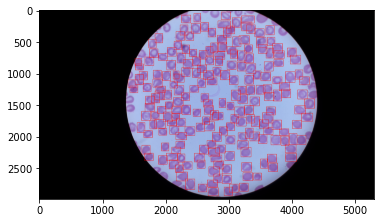

In [293]:
img = cv2.imread(df_file['img_path'].iloc[-1], cv2.IMREAD_COLOR)
img_with_box = bbv.draw_multiple_rectangles(img, df_file['bbx'].tolist(), bbox_color = (255, 0, 0), thickness=3)
plt.imshow(img_with_box)

# Convert to YOLO format

In [79]:
with open('../data/pickled/imgs_name.pkl', 'rb') as handle:
    imgs_name = pickle.load(handle)
with open('../data/pickled/true_boxes.pkl', 'rb') as handle:
    true_boxes = pickle.load(handle)
with open('../data/pickled/dict_bbxs.pkl', 'rb') as handle:
    dict_bbxs = pickle.load(handle)
with open('../data/pickled/labels.pkl', 'rb') as handle:
    df = pickle.load(handle)    

### Test train split patient level

In [ ]:
np.random.seed(2)
train_index = []
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    mask = np.random.rand(len(df_patient)) < 0.8
    train_index.extend(df_patient[mask].index)
    print('patient: ', patient_n, ' length train_index: ', len(train_index))

In [ ]:
df['train_test'] = 'test'
df.at[train_index, 'train_test'] = 'train'
df['train_test'].value_counts()

In [ ]:
#sanity check
print('percentage train: ', len(df[df['train_test'] == 'train']) / len(df))

In [ ]:
#sanity check patient level
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    percent_train = len(df_patient[df_patient['train_test'] == 'train']) / len(df_patient)
    print('patient: ', patient_n, ' percentage train: ', percent_train)

### Test train split patient & img_level

In [207]:
seed_n = 2
random.seed(seed_n)
train_index = []
for patient_n in df['patient_n_path'].unique():
    list_filenames = df.loc[df['patient_n_path'] == patient_n, 'filename'].unique().tolist()
    perct_total = round(len(list_filenames) * 0.8)
    list_filenames_masked = random.sample(list_filenames, perct_total)
    train_index.extend(df.loc[(df['patient_n_path'] == patient_n) & (df['filename'].isin(list_filenames_masked))].index)
    perc_train = len(df.loc[(df['patient_n_path'] == patient_n) & (df['filename'].isin(list_filenames_masked))]) / len(df.loc[(df['patient_n_path'] == patient_n)])
    print('patient: ', patient_n, ' percentage train cells: ', str(perc_train))

patient:  40  percentage train cells:  0.7600518806744487
patient:  13  percentage train cells:  0.8187772925764192
patient:  89  percentage train cells:  0.8023809523809524
patient:  201  percentage train cells:  0.7879481311975591
patient:  202  percentage train cells:  0.7963133640552995
patient:  47  percentage train cells:  0.8032258064516129
patient:  148  percentage train cells:  0.8312342569269522
patient:  16  percentage train cells:  0.7692307692307693
patient:  87  percentage train cells:  0.7617689015691869
patient:  203  percentage train cells:  0.8093725178713265
patient:  121  percentage train cells:  0.8029100529100529
patient:  50  percentage train cells:  0.7839335180055401
patient:  138  percentage train cells:  0.8067729083665338
patient:  60  percentage train cells:  0.7879858657243817
patient:  204  percentage train cells:  0.8022988505747126
patient:  3  percentage train cells:  0.8057768924302788
patient:  10  percentage train cells:  0.8297132927888793
patient:

patient:  35  percentage train cells:  0.8193891102257637
patient:  5  percentage train cells:  0.8043087971274686
patient:  102  percentage train cells:  0.8226059654631083
patient:  146  percentage train cells:  0.8119935170178282
patient:  129  percentage train cells:  0.8077777777777778
patient:  9  percentage train cells:  0.7528089887640449
patient:  137  percentage train cells:  0.8074277854195323
patient:  115  percentage train cells:  0.804945054945055
patient:  66  percentage train cells:  0.8169014084507042
patient:  42  percentage train cells:  0.7718780727630286
patient:  70  percentage train cells:  0.8104008667388949
patient:  36  percentage train cells:  0.816350710900474
patient:  105  percentage train cells:  0.7936404931862427
patient:  12  percentage train cells:  0.7365269461077845
patient:  120  percentage train cells:  0.8256130790190735
patient:  101  percentage train cells:  0.8161530286928799
patient:  141  percentage train cells:  0.8039014373716632
patient: 

In [208]:
df['train_test'] = 'test'
df.at[train_index, 'train_test'] = 'train'
df['train_test'].value_counts()

train    157849
test      39085
Name: train_test, dtype: int64

In [209]:
#sanity check
print('percentage train: ', len(df[df['train_test'] == 'train']) / len(df))

percentage train:  0.8015324931195222


In [210]:
#sanity check patient level
for patient_n in df['patient_n_path'].unique():
    df_patient = df.loc[df['patient_n_path'] == patient_n]
    percent_train = len(df_patient[df_patient['train_test'] == 'train']) / len(df_patient)
    print('patient: ', patient_n, ' percentage train: ', percent_train)

patient:  40  percentage train:  0.7600518806744487
patient:  13  percentage train:  0.8187772925764192
patient:  89  percentage train:  0.8023809523809524
patient:  201  percentage train:  0.7879481311975591
patient:  202  percentage train:  0.7963133640552995
patient:  47  percentage train:  0.8032258064516129
patient:  148  percentage train:  0.8312342569269522
patient:  16  percentage train:  0.7692307692307693
patient:  87  percentage train:  0.7617689015691869
patient:  203  percentage train:  0.8093725178713265
patient:  121  percentage train:  0.8029100529100529
patient:  50  percentage train:  0.7839335180055401
patient:  138  percentage train:  0.8067729083665338
patient:  60  percentage train:  0.7879858657243817
patient:  204  percentage train:  0.8022988505747126
patient:  3  percentage train:  0.8057768924302788
patient:  10  percentage train:  0.8297132927888793
patient:  205  percentage train:  0.804101838755304
patient:  206  percentage train:  0.8111842105263158
patie

In [327]:
df.head()

Patient no - Cell no        cell     comment annotation_type  \
0                  3-1  Uninfected  No_comment         Polygon   
1                  3-2  Uninfected  No_comment         Polygon   
2                  3-3  Uninfected  No_comment         Polygon   
3                  3-4  Uninfected  No_comment         Polygon   
4                  3-5  Uninfected  No_comment         Polygon   

  Number of points                                           position  \
0               14  [(2934, 38), (2955, 33), (2992, 35), (3015, 44...   
1               15  [(3013, 141), (2993, 144), (2972, 157), (2956,...   
2               14  [(2730, 135), (2704, 144), (2672, 165), (2661,...   
3               14  [(2379, 137), (2353, 149), (2334, 169), (2332,...   
4               14  [(2575, 140), (2548, 145), (2522, 161), (2500,...   

              filename                                           txt_path  \
0  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
1  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
2  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
3  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   
4  IMG_20150817_103139  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   

                                            img_path                     bbx  \
0  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...   [2905, 33, 3033, 131]   
1  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2951, 141, 3071, 272]   
2  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2658, 135, 2801, 276]   
3  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2332, 137, 2454, 265]   
4  ../data/NIH-NLM-ThinBloodSmearsPf/Polygon Set/...  [2499, 140, 2631, 272]   

   patient_n_path                                  adjusted_position  \
0              40  [(1652, 29), (1673, 24), (1710, 26), (1733, 35...   
1              40  [(1731, 132), (1711, 135), (1690, 148), (1674,...   
2              40  [(1448, 126), (1422, 135), (1390, 156), (1379,...   
3              40  [(1097, 128), (1071, 140), (1052, 160), (1050,...   
4              40  [(1293, 131), (1266, 136), (1240, 152), (1218,...   

                              img_path_fit_to_circle train_test  \
0  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train   
1  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train   
2  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train   
3  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train   
4  ../data/fit_to_circle/cropped_P40_IMG_20150817...      train   

             adjusted_bbx  
0   [1623, 24, 1751, 122]  
1  [1669, 132, 1789, 263]  
2  [1376, 126, 1519, 267]  
3  [1050, 128, 1172, 256]  
4  [1217, 131, 1349, 263]

### Save Polygon to YOLO for Poly Yolo

In [336]:
# produce textfiles for all elements in the train and validation dataset
# FORMAT:
# path_to\image1.jpg x1,y1,x2,y2,class,p1x,p1y,pnx,pny x1,y1,x2,y2,class,p1x,p1y,pnx,pny
previous_row = '1'
file = open('../data/fit_to_circle/poly_yolo_train.txt',"w+")
for img_path_fit_to_circle in df.loc[(df['annotation_type'] == 'Polygon') &  
                                        (df['train_test'] == 'train'), 'img_path_fit_to_circle'].unique():
    #print(img_path_fit_to_circle)
    file.write(str(img_path_fit_to_circle) + ' ')
    for index, row in df[df['img_path_fit_to_circle'] == img_path_fit_to_circle].iterrows():
        if row is not previous_row:
            file.write(str(row['adjusted_bbx'][0]) + ',' +
                       str(row['adjusted_bbx'][1]) + ',' +
                       str(row['adjusted_bbx'][2]) + ',' +
                       str(row['adjusted_bbx'][3]) + ',' +
                       str(row['cell']) + ','  +
                        ''.join(str(str(poly[0]) + ',' + str(poly[1]) + ',') for poly in row['adjusted_position'])                        + ' ')
    file.write('\n')
    previous_row = row
file.close()

In [337]:
# produce textfiles for all elements in the train and validation dataset
# FORMAT:
# path_to\image1.jpg x1,y1,x2,y2,class,p1x,p1y,pnx,pny x1,y1,x2,y2,class,p1x,p1y,pnx,pny
previous_row = '1'
file = open('../data/fit_to_circle/poly_yolo_test.txt',"w+")
for img_path_fit_to_circle in df.loc[(df['annotation_type'] == 'Polygon') &  
                                        (df['train_test'] == 'test'), 'img_path_fit_to_circle'].unique():
    #print(img_path_fit_to_circle)
    file.write(str(img_path_fit_to_circle) + ' ')
    for index, row in df[df['img_path_fit_to_circle'] == img_path_fit_to_circle].iterrows():
        if row is not previous_row:
            file.write(str(row['adjusted_bbx'][0]) + ',' +
                       str(row['adjusted_bbx'][1]) + ',' +
                       str(row['adjusted_bbx'][2]) + ',' +
                       str(row['adjusted_bbx'][3]) + ',' +
                       str(row['cell']) + ','  +
                        ''.join(str(str(poly[0]) + ',' + str(poly[1]) + ',') for poly in row['adjusted_position'])                        + ' ')
    file.write('\n')
    previous_row = row
file.close()